In [1]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib.use('GTK3Agg') 
# %matplotlib notebook

In [6]:
# x0 = np.load('pcam_reb_x_0.npy')
# x1 = np.load('pcam_reb_x_1.npy')
# t0 = np.load('pcam_reb_t_0.npy')
# t1 = np.load('pcam_reb_t_1.npy')
# title = 'pcam_reb'  # AKF is better

x0 = np.load('../experiments/pcam_x_0.npy')
x1 = np.load('../experiments/pcam_x_1.npy')
t0 = np.load('../experiments/pcam_t_0.npy')
t1 = np.load('../experiments/pcam_t_1.npy')
title = 'pcam'   # AB is better

train = np.concatenate((x0, x1))
test = np.concatenate((t0, t1)) 

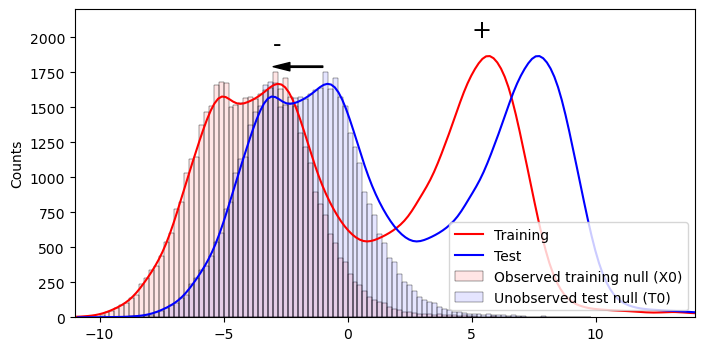

<Figure size 640x480 with 0 Axes>

In [8]:
fig, ax = plt.subplots(figsize=(8,4))
stat = 'count'
bin_range = np.arange(-10,10,0.2)


ax = sns.kdeplot(train,bw_adjust=0.7, label='Training', color='red')
# Scale to counts
x, y = ax.lines[0].get_data()
n = len(train)
bin_width = x[2] - x[1]
ax.lines[0].set_ydata(y * n * bin_width*1.3)

a=sns.histplot(x0, bins=bin_range, stat=stat,color='red', kde=False, fill=True, label='Observed training null (X0)', alpha=0.1)

test = train + 2
t0p = x0+2

axt = sns.kdeplot(test, bw_adjust=0.7, label='Test', color='blue')
# Scale to counts
x, y = axt.lines[1].get_data()
n = len(test)
bin_width = x[2] - x[1]
axt.lines[1].set_ydata(y * n * bin_width*1.3)
plt.text(-3, 1900, "-", size='xx-large', style='normal')
plt.text(5, 2000, "+", size='xx-large', style='normal')

ax.annotate('', xy=(-3, 1790), xytext=(-1, 1790),
             arrowprops=dict(facecolor='black', shrink=0.0,width=1, headwidth=6))

a=sns.histplot(t0p, bins=bin_range, stat=stat,color='blue', kde=False, fill=True, label='Unobserved test null (T0)', alpha=0.1)

# a=sns.histplot(test, bins=bin_range, stat=stat,color='yellow', kde=True, fill=True)

f = plt.figure()
leg = ax.legend(loc="lower right")
# ax.set_title(title)
ax.set_xlim(-11,14)
ax.set_ylim(0,2200)
ax.set_ylabel('Counts')
plt.show()
fig.savefig('TNA_sketch_before.pdf',format='pdf', bbox_inches='tight')

#a=sns.kdeplot(train, color='purple', fill=False)
# a=sns.histplot(train, bins=bin_range, stat=stat, color='purple', kde=True, fill=False,element="step")
# a=sns.histplot(x1, bins=bin_range, stat='density',color='blue', kde=True, fill=True, label='x1')
# a=sns.histplot(t0, bins=bin_range, stat='density',color='green', kde=True, fill=False, label='t0')
# a=sns.histplot(t1, bins=bin_range, stat='density',color='orange', kde=True, fill=False, label='t1')


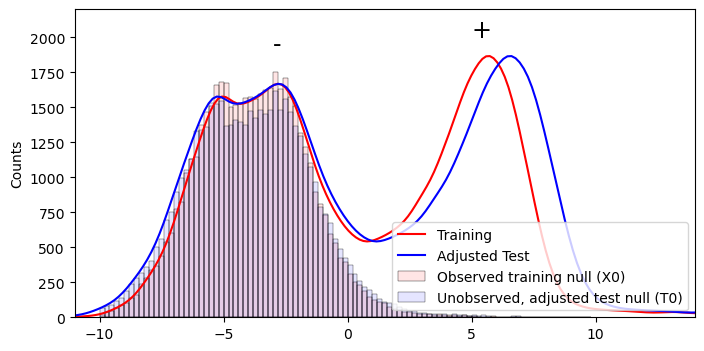

<Figure size 640x480 with 0 Axes>

In [9]:
fig, ax = plt.subplots(figsize=(8,4))
stat = 'count'
bin_range = np.arange(-10,10,0.2)


ax = sns.kdeplot(train,bw_adjust=0.7, label='Training', color='red')
# Scale to counts
x, y = ax.lines[0].get_data()
n = len(train)
bin_width = x[2] - x[1]
ax.lines[0].set_ydata(y * n * bin_width*1.3)

a=sns.histplot(x0, bins=bin_range, stat=stat,color='red', kde=False, fill=True, label='Observed training null (X0)', alpha=0.1)

test = train*1.1 + 0.3
t0p = x0*1.1 + 0.3

axt = sns.kdeplot(test, bw_adjust=0.7, label='Adjusted Test', color='blue')
# Scale to counts
x, y = axt.lines[1].get_data()
n = len(test)
bin_width = x[2] - x[1]
axt.lines[1].set_ydata(y * n * bin_width*1.3)
plt.text(-3, 1900, "-", size='xx-large', style='normal')
plt.text(5, 2000, "+", size='xx-large', style='normal')

# ax.annotate('Arrow', xy=(-3, 1770), xytext=(-1, 1790),
#              arrowprops=dict(facecolor='black', shrink=0.0,width=1, headwidth=6))

a=sns.histplot(t0p, bins=bin_range, stat=stat,color='blue', kde=False, fill=True, label='Unobserved, adjusted test null (T0)', alpha=0.1)

# a=sns.histplot(test, bins=bin_range, stat=stat,color='yellow', kde=True, fill=True)

f = plt.figure()
leg = ax.legend(loc="lower right")
# ax.set_title(title)
ax.set_xlim(-11,14)
ax.set_ylim(0,2200)
ax.set_ylabel('Counts')
plt.show()
fig.savefig('TNA_sketch_after.pdf',format='pdf', bbox_inches='tight')

#a=sns.kdeplot(train, color='purple', fill=False)
# a=sns.histplot(train, bins=bin_range, stat=stat, color='purple', kde=True, fill=False,element="step")
# a=sns.histplot(x1, bins=bin_range, stat='density',color='blue', kde=True, fill=True, label='x1')
# a=sns.histplot(t0, bins=bin_range, stat='density',color='green', kde=True, fill=False, label='t0')
# a=sns.histplot(t1, bins=bin_range, stat='density',color='orange', kde=True, fill=False, label='t1')